In [26]:
#Import different libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras import ops

import pickle


In [27]:
#Import paths
BASE_PATH = "../"
DATA = os.path.join(BASE_PATH, "data")
DATA_TRAIN = os.path.join(DATA, "train")
DATA_VALIDATION = os.path.join(DATA, "validation")

In [28]:
#Check data
# Check data folders structure
print("Contenu du dossier 'train' :", os.listdir(DATA_TRAIN))

# check subfolders content
for subdir in os.listdir(DATA_TRAIN):
    subdir_path = os.path.join(DATA_TRAIN, subdir)
    if os.path.isdir(subdir_path):
        print(f"Contenu du sous-dossier '{subdir}' :", os.listdir(subdir_path))

Contenu du dossier 'train' : ['covid', 'lung_opacity', 'normal', 'pneumonia']
Contenu du sous-dossier 'covid' : ['covid_1.png', 'covid_10.png', 'covid_100.png', 'covid_1000.png', 'covid_1001.png', 'covid_1002.png', 'covid_1003.png', 'covid_1004.png', 'covid_1005.png', 'covid_1006.png', 'covid_1007.png', 'covid_1008.png', 'covid_1009.png', 'covid_101.png', 'covid_1010.png', 'covid_1011.png', 'covid_1012.png', 'covid_1013.png', 'covid_1014.png', 'covid_1015.png', 'covid_1016.png', 'covid_1017.png', 'covid_1018.png', 'covid_1019.png', 'covid_102.png', 'covid_1020.png', 'covid_1021.png', 'covid_1022.png', 'covid_1023.png', 'covid_1024.png', 'covid_1025.png', 'covid_1026.png', 'covid_1027.png', 'covid_1028.png', 'covid_1029.png', 'covid_103.png', 'covid_1030.png', 'covid_1031.png', 'covid_1032.png', 'covid_1033.png', 'covid_1034.png', 'covid_1035.png', 'covid_1036.png', 'covid_1037.png', 'covid_1038.png', 'covid_1039.png', 'covid_104.png', 'covid_1040.png', 'covid_1041.png', 'covid_1042.png

In [29]:
#Parameters setup
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

In [30]:
# Prepare data generator with split for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation set
)

train_generator = train_datagen.flow_from_directory(
    DATA_TRAIN,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  #80% for training
    classes=['covid', 'lung_opacity', 'normal', 'pneumonia', 'trash']
)

validation_generator = train_datagen.flow_from_directory(
    DATA_TRAIN,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # 20% for validation
    classes=['covid', 'lung_opacity', 'normal', 'pneumonia', 'trash']
)

# Print classes
print("Classes trouvées :", train_generator.class_indices)

# print number of images in each generator
print(f"Nombre d'images d'entraînement : {train_generator.samples}")
print(f"Nombre d'images de validation : {validation_generator.samples}")

Found 16933 images belonging to 5 classes.
Found 4232 images belonging to 5 classes.
Classes trouvées : {'covid': 0, 'lung_opacity': 1, 'normal': 2, 'pneumonia': 3, 'trash': 4}
Nombre d'images d'entraînement : 16933
Nombre d'images de validation : 4232


In [31]:
#Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

c:\Users\Tom\anaconda3\envs\pulmoScan4\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

In [34]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/20


c:\Users\Tom\anaconda3\envs\pulmoScan4\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


530/530 ━━━━━━━━━━━━━━━━━━━━ 155s 289ms/step - accuracy: 0.5868 - loss: 1.0222 - val_accuracy: 0.7261 - val_loss: 0.6649
Epoch 2/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 151s 283ms/step - accuracy: 0.7177 - loss: 0.6951 - val_accuracy: 0.7578 - val_loss: 0.6469
Epoch 3/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 151s 283ms/step - accuracy: 0.7778 - loss: 0.5735 - val_accuracy: 0.8176 - val_loss: 0.4834
Epoch 4/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 150s 281ms/step - accuracy: 0.7994 - loss: 0.5223 - val_accuracy: 0.8197 - val_loss: 0.4870
Epoch 5/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 150s 282ms/step - accuracy: 0.8186 - loss: 0.4764 - val_accuracy: 0.8256 - val_loss: 0.4757
Epoch 6/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 150s 281ms/step - accuracy: 0.8292 - loss: 0.4455 - val_accuracy: 0.8462 - val_loss: 0.4011
Epoch 7/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 149s 280ms/step - accuracy: 0.8425 - loss: 0.4093 - val_accuracy: 0.8528 - val_loss: 0.4066
Epoch 8/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 151s 284ms/step - accuracy: 0.8560 - loss: 0.38

In [35]:

# ÉEvalute the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.8894 - loss: 0.3064
Validation accuracy: 88.54%


In [36]:
# Save the model
model.save('../models/cnn_model.h5')

# Convert the model to a pickle file
with open('../models/cnn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

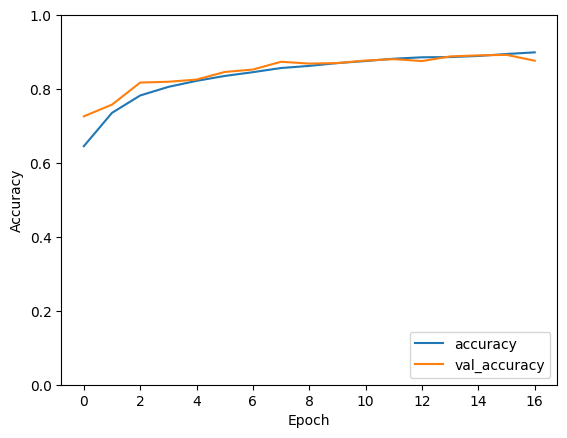

In [37]:
# Visualize training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()